In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from data_prep import data_prep
import get_model
import utils

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
dfreal = pd.read_csv('dataset\Biomass_Private.csv')

data_loader = data_prep()
data_loader.create_images(width=80, height=64)
selected_pix = data_loader.selected_pix
images = data_loader.get_images()
dfbio = data_loader.dfbio

In [3]:
# fig, axes = plt.subplots(2,4, figsize=(20,8))
# for i,image in enumerate(images):
#     axes.flatten()[i].imshow(image, cmap='gray')

In [4]:
model = get_model.ConvLSTM_3(dfbio,images)
X_train, y_train, X_val, y_val = model.prepare_data(fit=False)
history = model.eval(X_train, y_train, X_val, y_val)
# preds_image, preds_list = model.predict(selected_pix)

Epoch 1/300
4/4 [==============================] - 11s 1s/step - loss: 65.1860 - val_loss: 74.4750 - lr: 0.0100
Epoch 2/300
4/4 [==============================] - 4s 1s/step - loss: 63.4427 - val_loss: 73.5889 - lr: 0.0100
Epoch 3/300
4/4 [==============================] - 4s 1s/step - loss: 62.4466 - val_loss: 72.6887 - lr: 0.0100
Epoch 4/300
4/4 [==============================] - 4s 988ms/step - loss: 61.3674 - val_loss: 72.0123 - lr: 0.0100
Epoch 5/300
4/4 [==============================] - 5s 1s/step - loss: 60.1550 - val_loss: 71.2806 - lr: 0.0100
Epoch 6/300
4/4 [==============================] - 4s 1s/step - loss: 58.8433 - val_loss: 70.6103 - lr: 0.0100
Epoch 7/300
4/4 [==============================] - 4s 1s/step - loss: 57.4333 - val_loss: 69.4832 - lr: 0.0100
Epoch 8/300
4/4 [==============================] - 4s 1s/step - loss: 55.8660 - val_loss: 68.5585 - lr: 0.0100
Epoch 9/300
4/4 [==============================] - 4s 1s/step - loss: 54.2125 - val_loss: 67.2954 - lr: 0.01

50 100 200 250 : 27.428  
100 200 : 26.04

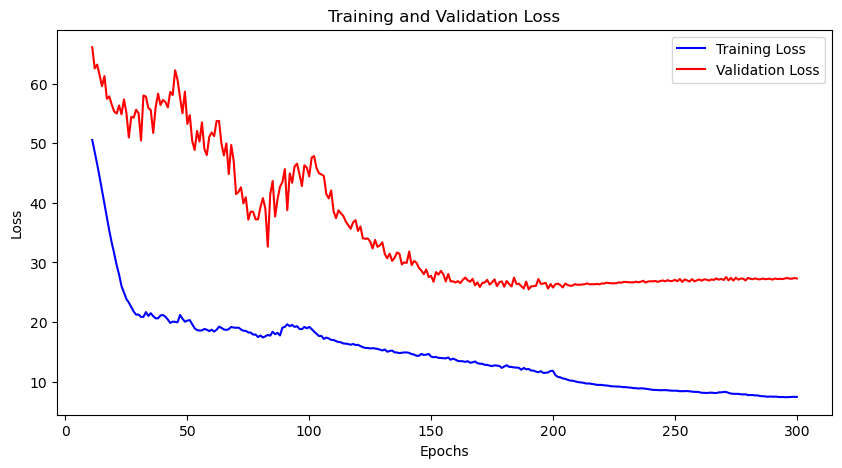

In [5]:
utils.plot_loss(history,offset=10,val=True)

In [10]:
utils.save_model(model.model, 'ConvLSTM_M_300_27.30_val')

Save Successful!


In [6]:
preds_image, preds_list = model.predict(selected_pix)

1/1 [==============================] - 0s 231ms/step


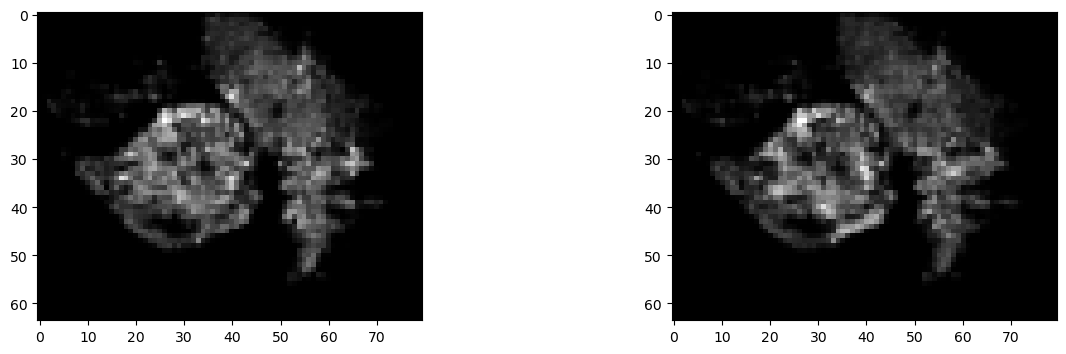

In [7]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
axes[0].imshow(preds_image[0][0,:,:,0], cmap='gray')
axes[1].imshow(preds_image[1][0,:,:,0], cmap='gray')

In [8]:
np.sum(preds_list['2018']),np.sum(preds_list['2019'])

(320315.2, 329457.62)

In [9]:
utils.real_eval(preds_list, dfreal)

(36.699782320784834, 47.243164658870825)